時間:每秒
分別對theta、alpha、gamma、theta alpha 、alpha gamma、theta gamma、theta alpha gamma、gamma1-6

In [1]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

'wget' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC
'export' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


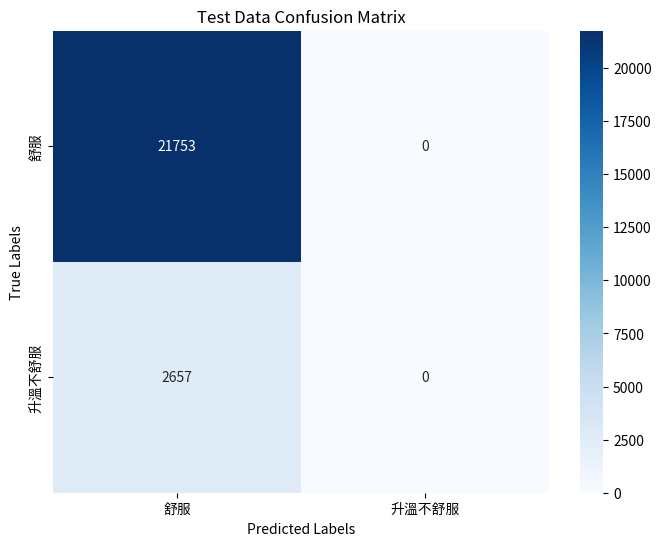

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


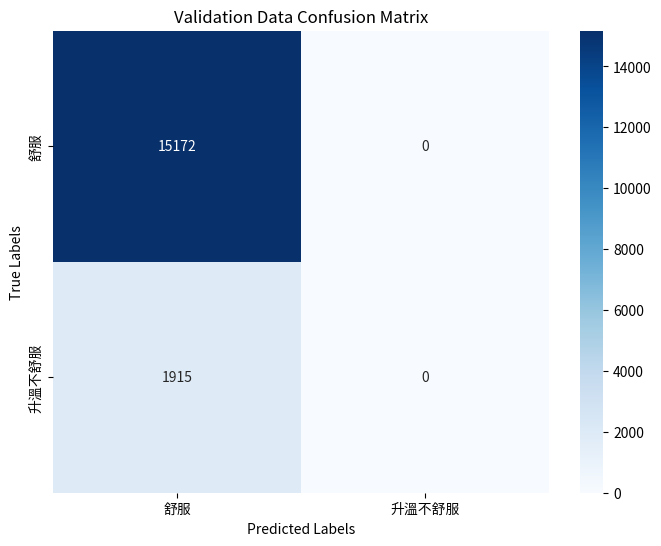

In [22]:
#羅吉斯回歸 Cz 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    X_train_new.append([theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    X_test_new.append([theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['theta']
    X_val_new.append(([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


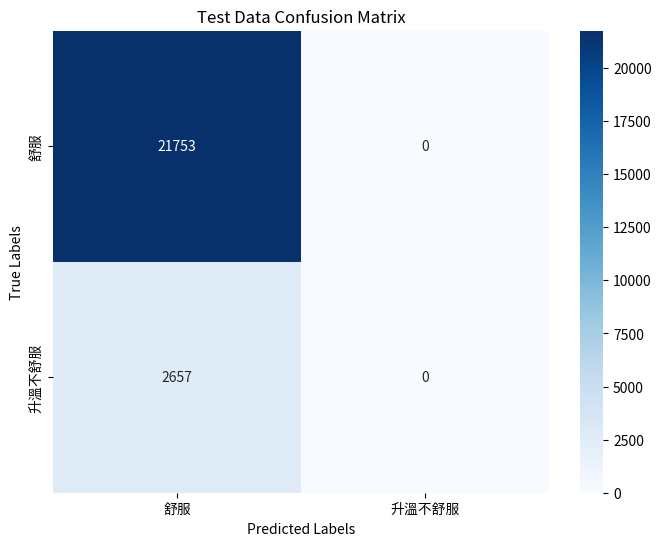

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


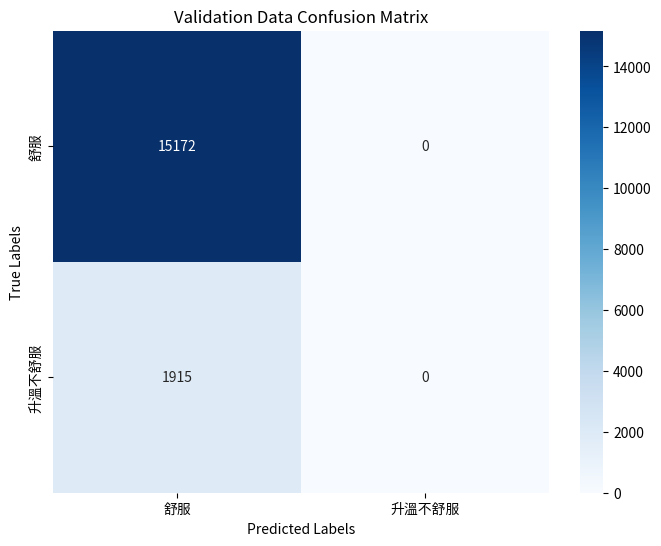

In [23]:
#羅吉斯回歸  Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    X_train_new.append([theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    X_test_new.append([theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['theta']
    X_val_new.append(([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


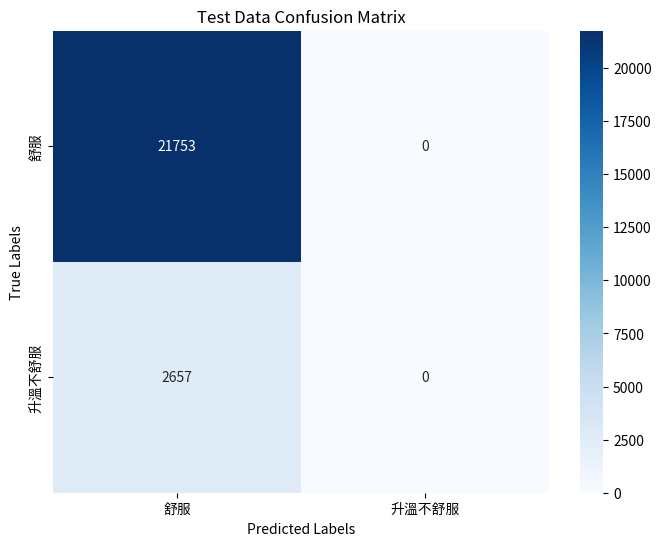

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


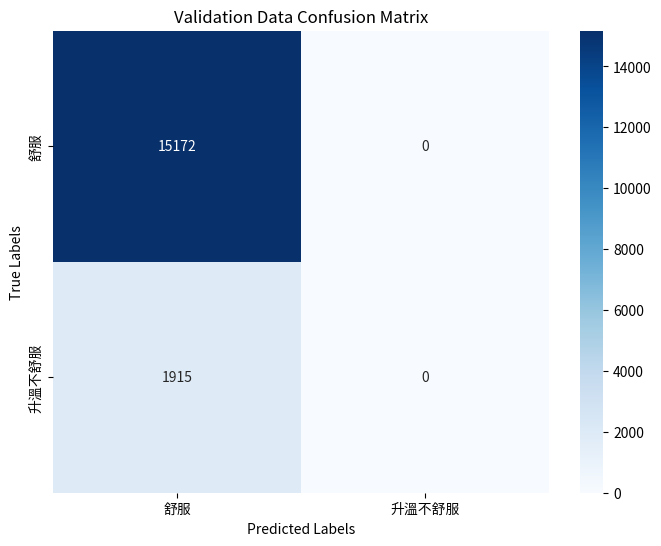

In [24]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_Cz_combined = train_data.iloc[i]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i]['theta_Fz']  # 直接取出數值
    X_train_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   theta_Cz_combined = test_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i]['theta_Fz']  # 直接取出數值
   X_test_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   theta_Cz_combined = validation_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i]['theta_Fz']  # 直接取出數值
   X_val_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


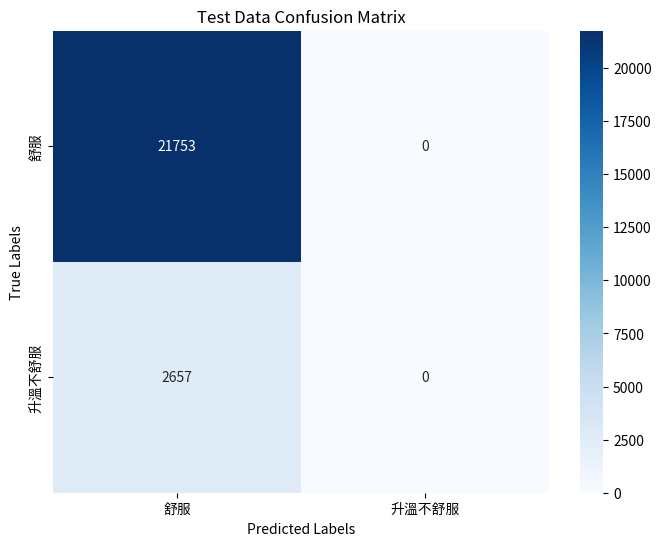

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


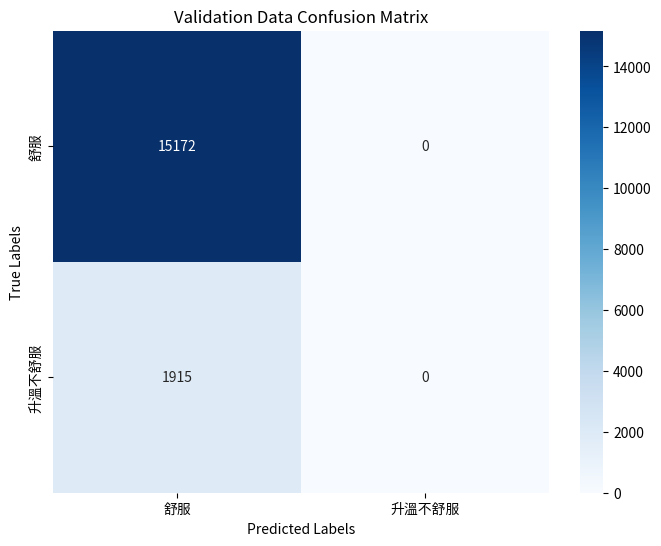

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


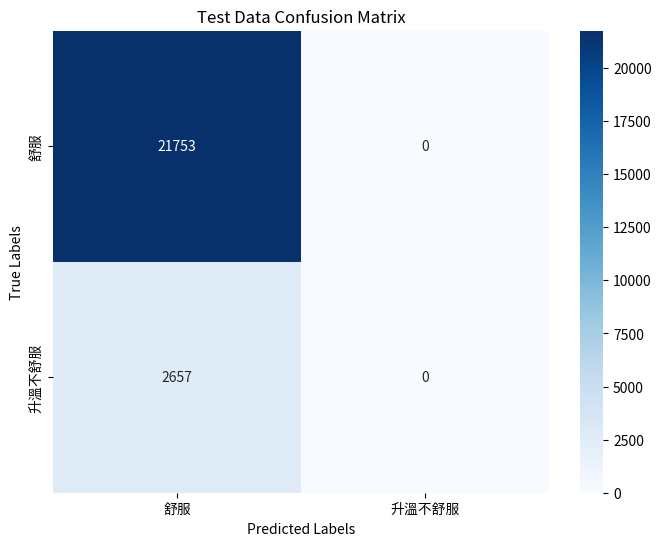

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


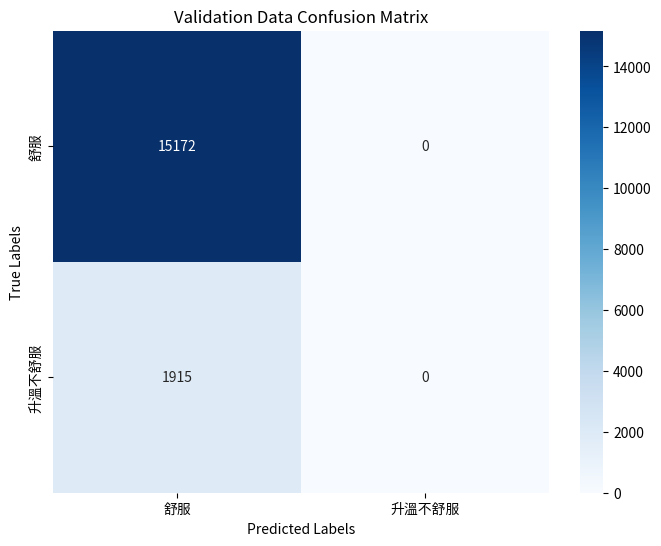

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


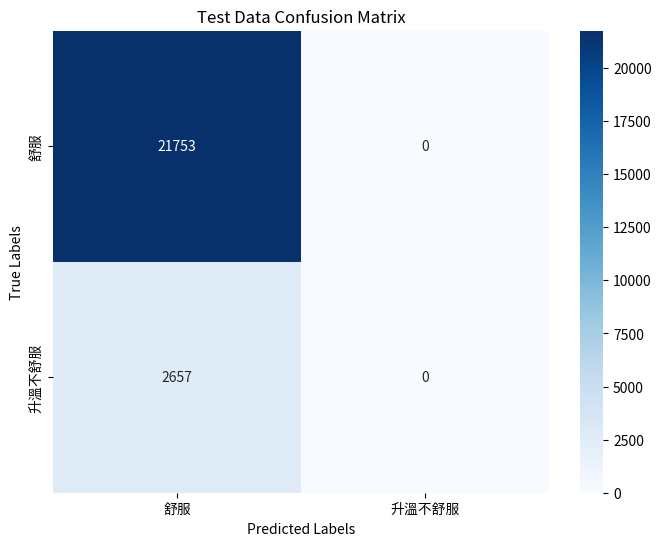

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


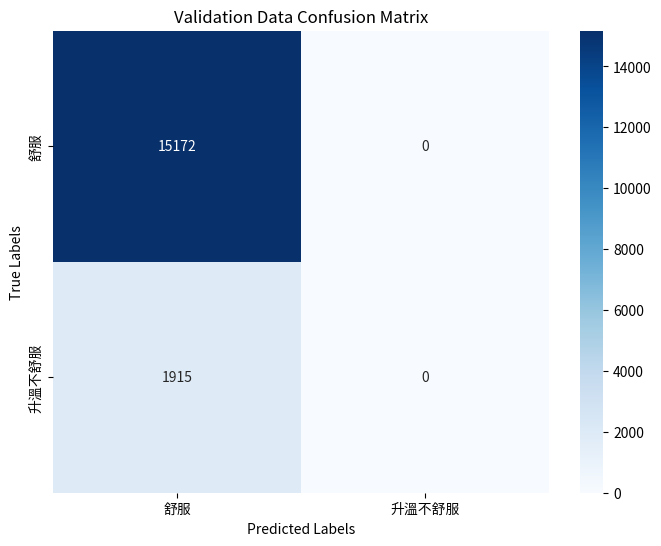

In [27]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_Cz_combined = train_data.iloc[i]['alpha_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i]['alpha_Fz']  # 直接取出數值
    X_train_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   theta_Cz_combined = test_data.iloc[i]['alpha_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_test_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   theta_Cz_combined = validation_data.iloc[i]['alpha_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_val_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9858664481769767
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     21753
       升溫不舒服       0.93      0.94      0.94      2657

    accuracy                           0.99     24410
   macro avg       0.96      0.96      0.96     24410
weighted avg       0.99      0.99      0.99     24410

測試集混淆矩陣:


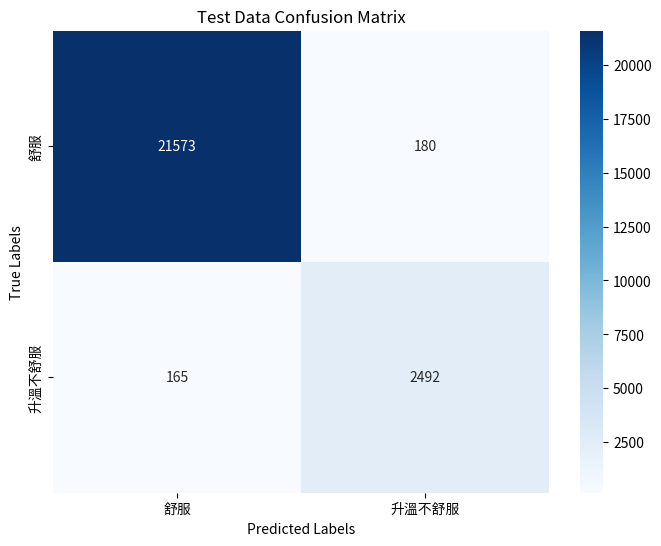

驗證集準確率: 0.9866565225024873
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     15172
       升溫不舒服       0.94      0.94      0.94      1915

    accuracy                           0.99     17087
   macro avg       0.97      0.97      0.97     17087
weighted avg       0.99      0.99      0.99     17087

驗證集混淆矩陣:


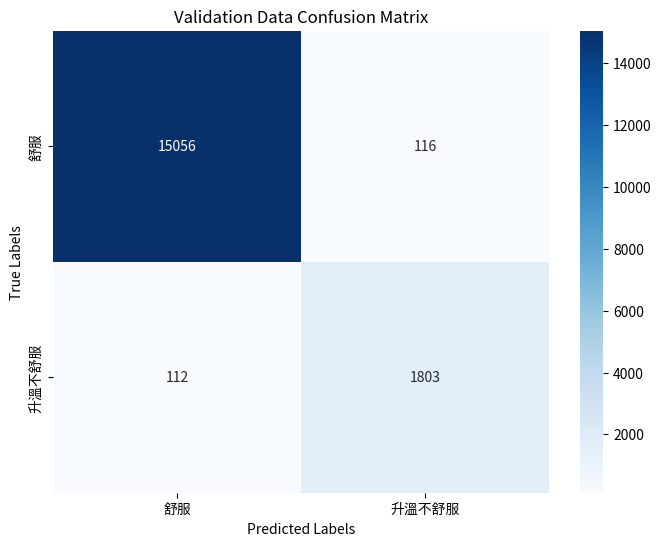

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    X_train_new.append([theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['gamma']  # 使用theta值
    X_test_new.append([theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['gamma']
    X_val_new.append(([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9972142564522737
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.97      0.99      2657

    accuracy                           1.00     24410
   macro avg       1.00      0.99      0.99     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


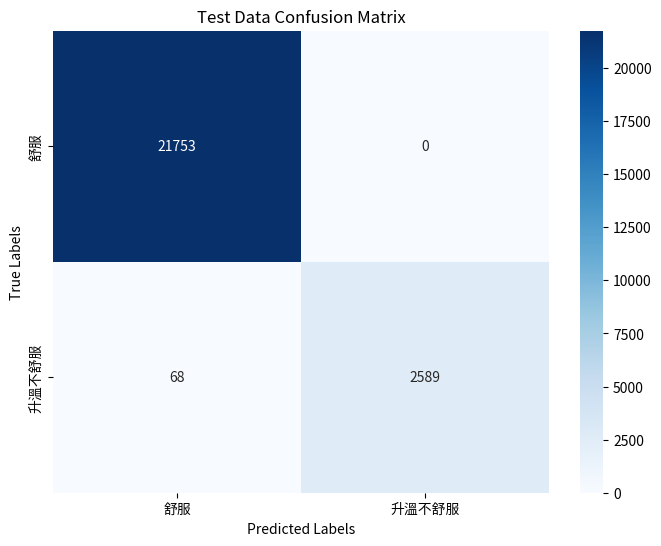

驗證集準確率: 0.9971908468426289
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15172
       升溫不舒服       1.00      0.97      0.99      1915

    accuracy                           1.00     17087
   macro avg       1.00      0.99      0.99     17087
weighted avg       1.00      1.00      1.00     17087

驗證集混淆矩陣:


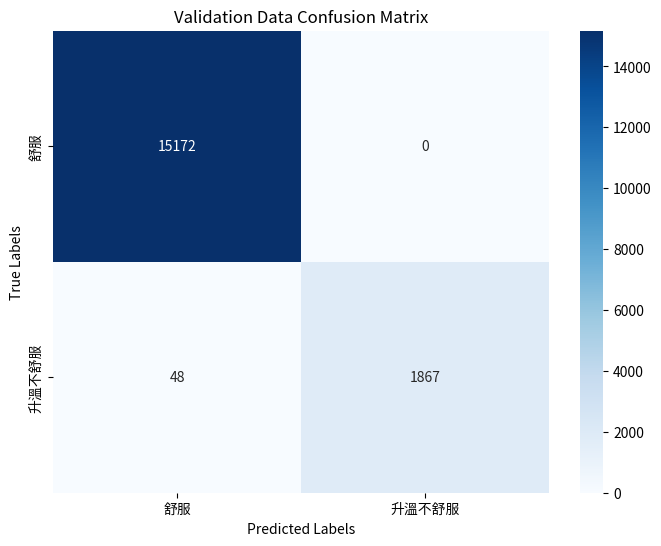

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    X_train_new.append([theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['gamma']  # 使用theta值
    X_test_new.append([theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['gamma']
    X_val_new.append(([theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9990987300286768
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.99      1.00      2657

    accuracy                           1.00     24410
   macro avg       1.00      1.00      1.00     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


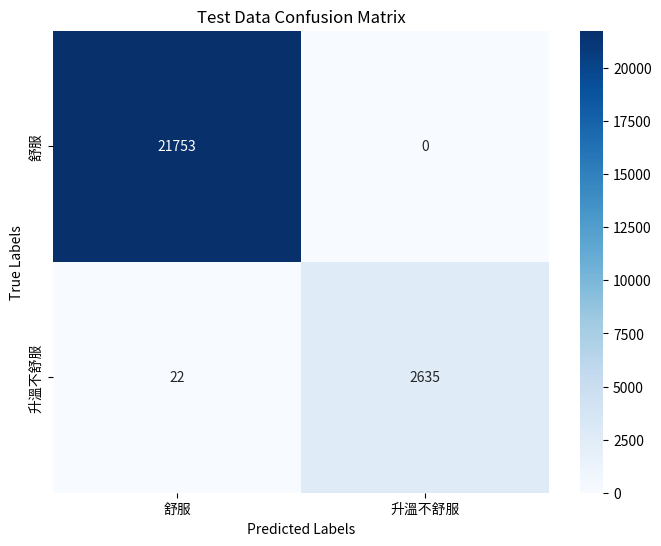

驗證集準確率: 0.9992391876865453
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15172
       升溫不舒服       1.00      0.99      1.00      1915

    accuracy                           1.00     17087
   macro avg       1.00      1.00      1.00     17087
weighted avg       1.00      1.00      1.00     17087

驗證集混淆矩陣:


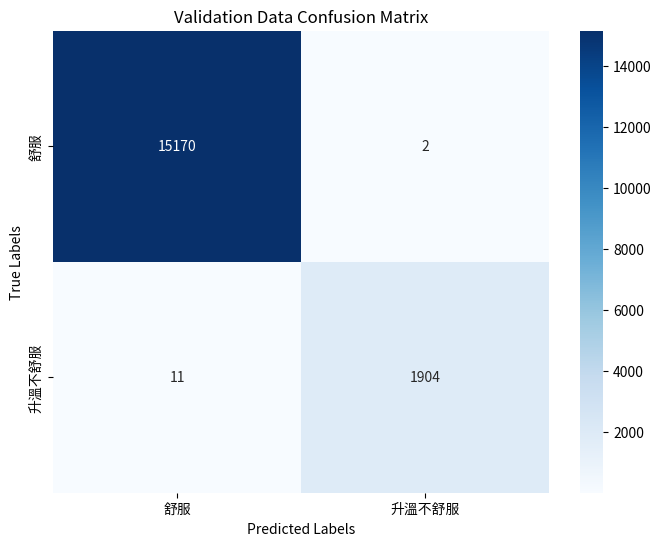

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_Cz_combined = train_data.iloc[i]['gamma_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i]['gamma_Fz']  # 直接取出數值
    X_train_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   theta_Cz_combined = test_data.iloc[i]['gamma_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i]['gamma_Fz']  # 直接取出數值
   X_test_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   theta_Cz_combined = validation_data.iloc[i]['gamma_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i]['gamma_Fz']  # 直接取出數值
   X_val_new.append(([theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


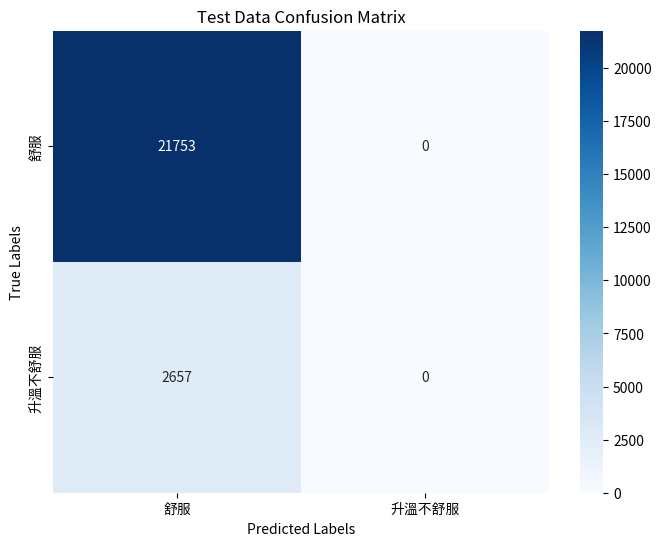

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


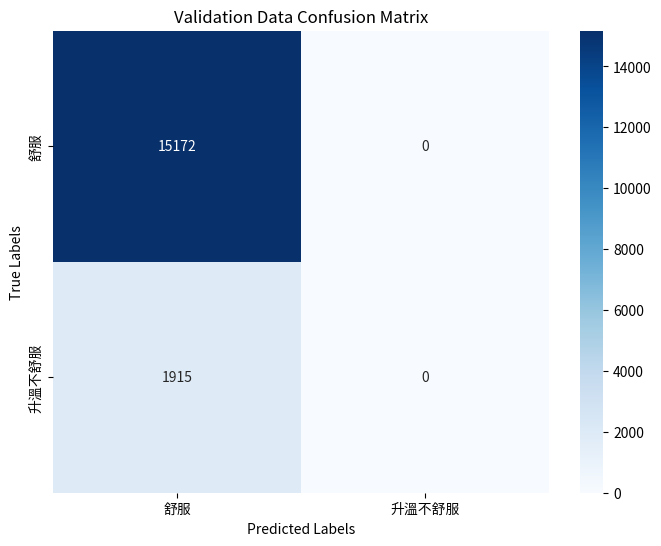

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([theta_combined,alpha_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([theta_combined,alpha_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['theta']
    alpha_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined,alpha_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


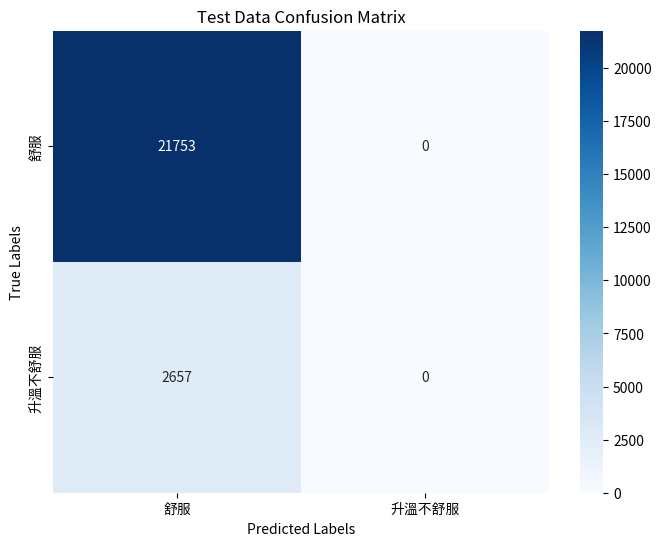

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


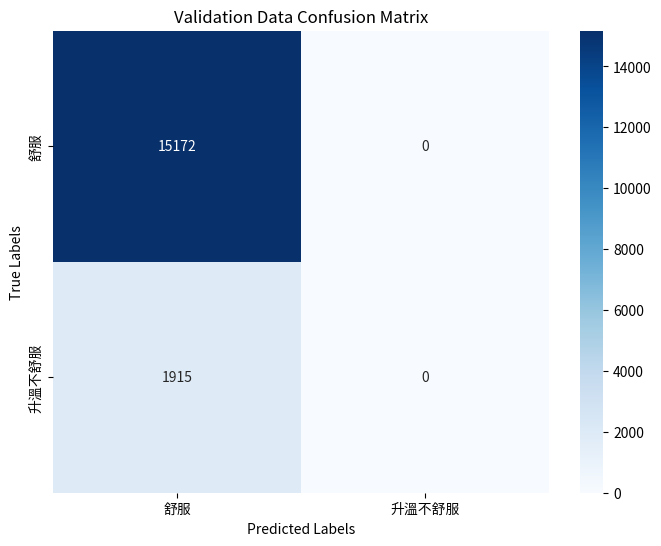

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([theta_combined,alpha_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([theta_combined,alpha_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    theta_combined = validation_data.iloc[i]['theta']
    alpha_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined,alpha_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.891151167554281
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     21753
       升溫不舒服       0.00      0.00      0.00      2657

    accuracy                           0.89     24410
   macro avg       0.45      0.50      0.47     24410
weighted avg       0.79      0.89      0.84     24410

測試集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


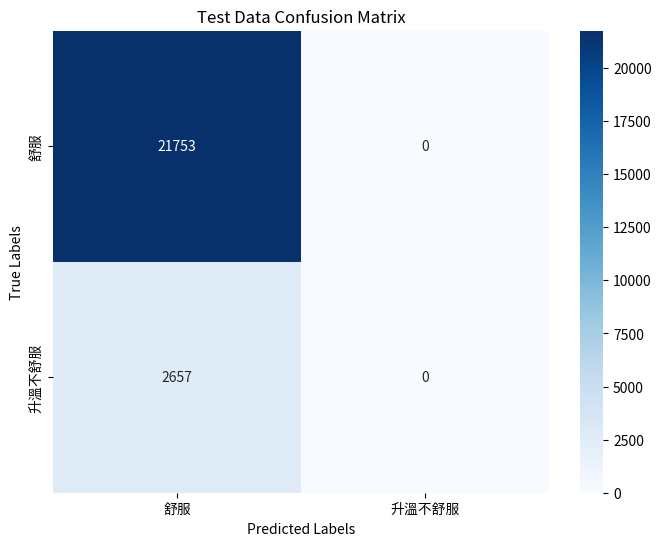

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


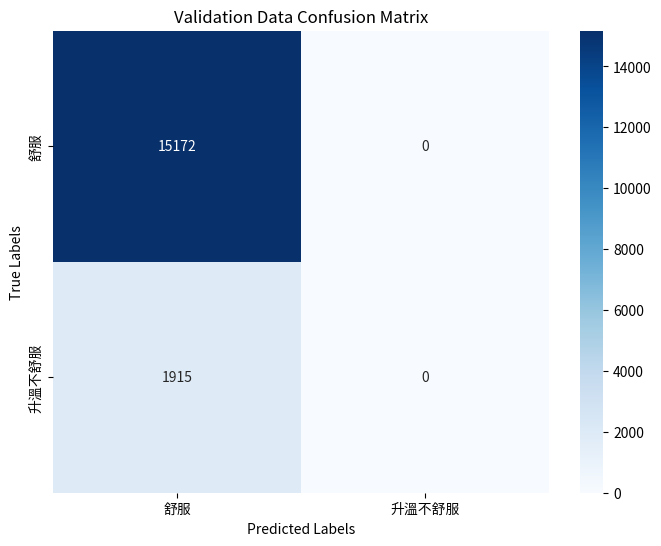

In [33]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    theta_Cz_combined = train_data.iloc[i]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i]['theta_Fz']  # 直接取出數值
    alpha_Cz_combined = train_data.iloc[i]['alpha_Cz']  # 直接取出數值
    alpha_Fz_combined = train_data.iloc[i]['alpha_Fz']  # 直接取出數值
    X_train_new.append(([theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   theta_Cz_combined = test_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = test_data.iloc[i]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = test_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_test_new.append(([theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   theta_Cz_combined = validation_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = validation_data.iloc[i]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = validation_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_val_new.append(([theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9858664481769767
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     21753
       升溫不舒服       0.93      0.94      0.94      2657

    accuracy                           0.99     24410
   macro avg       0.96      0.97      0.96     24410
weighted avg       0.99      0.99      0.99     24410

測試集混淆矩陣:


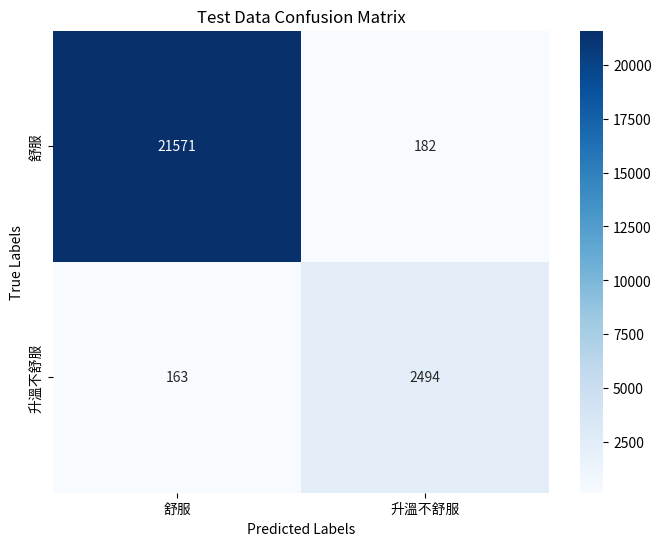

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


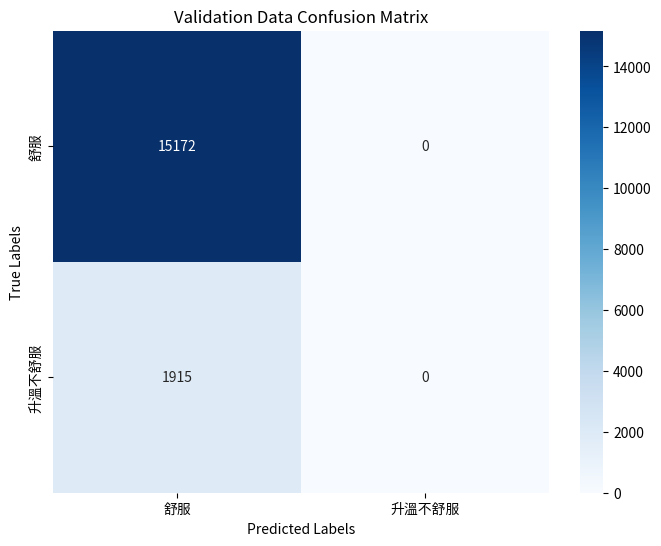

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    alpha_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([gamma_combined,alpha_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma_combined = test_data.iloc[i]['gamma']  # 使用theta值
    alpha_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([gamma_combined,alpha_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma_combined = validation_data.iloc[i]['gamma']
    alpha_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined,alpha_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9973371569029087
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.98      0.99      2657

    accuracy                           1.00     24410
   macro avg       1.00      0.99      0.99     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


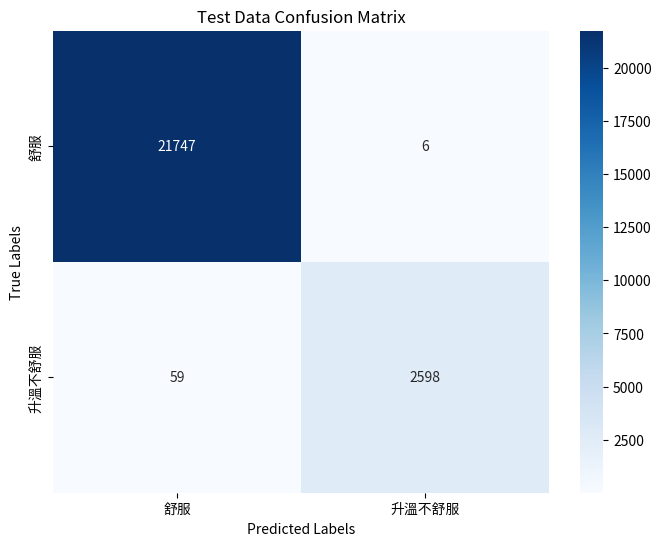

驗證集準確率: 0.8879264938257154
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      1.00      0.94     15172
       升溫不舒服       0.00      0.00      0.00      1915

    accuracy                           0.89     17087
   macro avg       0.44      0.50      0.47     17087
weighted avg       0.79      0.89      0.84     17087

驗證集混淆矩陣:


c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\envs\net\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


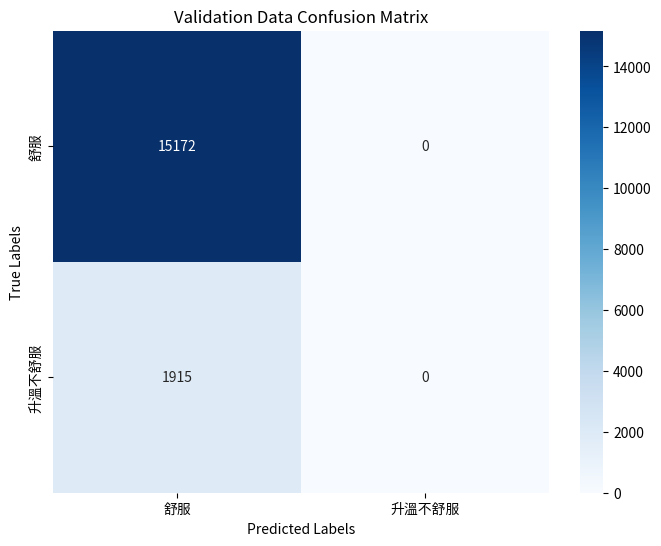

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    alpha_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([gamma_combined,alpha_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma_combined = test_data.iloc[i]['gamma']  # 使用theta值
    alpha_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([gamma_combined,alpha_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma_combined = validation_data.iloc[i]['gamma']
    alpha_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined,alpha_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9991806636624334
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.99      1.00      2657

    accuracy                           1.00     24410
   macro avg       1.00      1.00      1.00     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


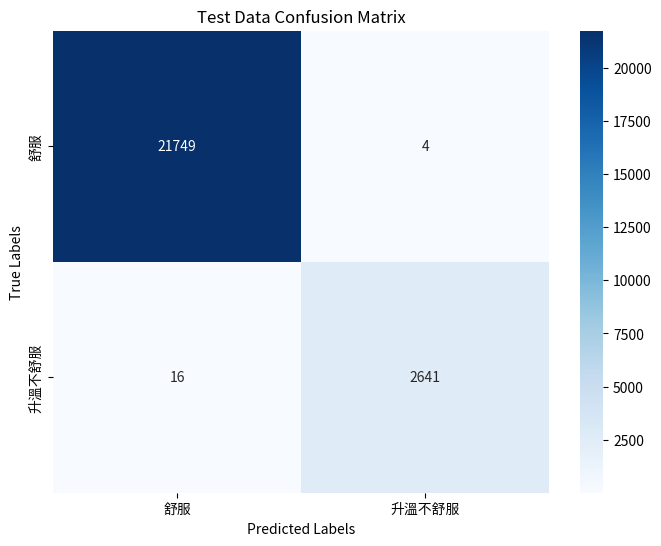

驗證集準確率: 0.9991806636624334
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15172
       升溫不舒服       1.00      0.99      1.00      1915

    accuracy                           1.00     17087
   macro avg       1.00      1.00      1.00     17087
weighted avg       1.00      1.00      1.00     17087

驗證集混淆矩陣:


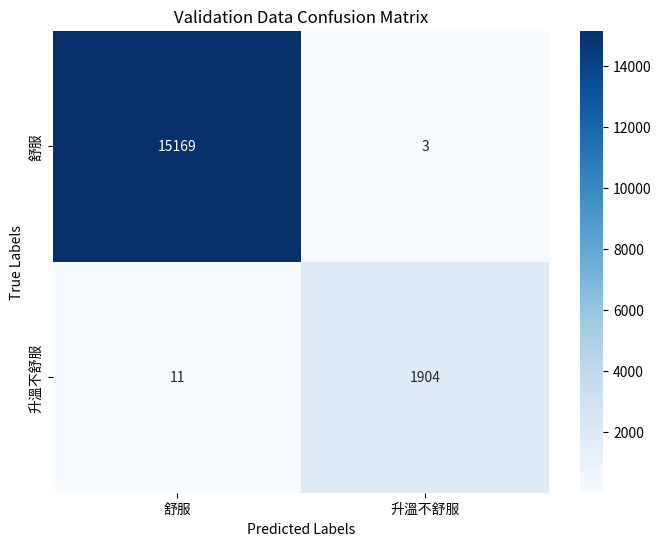

In [36]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_Cz_combined = train_data.iloc[i]['gamma_Cz']  # 直接取出數值
    gamma_Fz_combined = train_data.iloc[i]['gamma_Fz']  # 直接取出數值
    alpha_Cz_combined = train_data.iloc[i]['alpha_Cz']  # 直接取出數值
    alpha_Fz_combined = train_data.iloc[i]['alpha_Fz']  # 直接取出數值
    X_train_new.append(([gamma_Cz_combined,gamma_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   gamma_Cz_combined = test_data.iloc[i]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = test_data.iloc[i]['gamma_Fz']  # 直接取出數值
   alpha_Cz_combined = test_data.iloc[i]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = test_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_test_new.append(([gamma_Cz_combined,gamma_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   gamma_Cz_combined = validation_data.iloc[i]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = validation_data.iloc[i]['gamma_Fz']  # 直接取出數值
   alpha_Cz_combined = validation_data.iloc[i]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = validation_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_val_new.append(([gamma_Cz_combined,gamma_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9860712822613683
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     21753
       升溫不舒服       0.93      0.94      0.94      2657

    accuracy                           0.99     24410
   macro avg       0.96      0.97      0.96     24410
weighted avg       0.99      0.99      0.99     24410

測試集混淆矩陣:


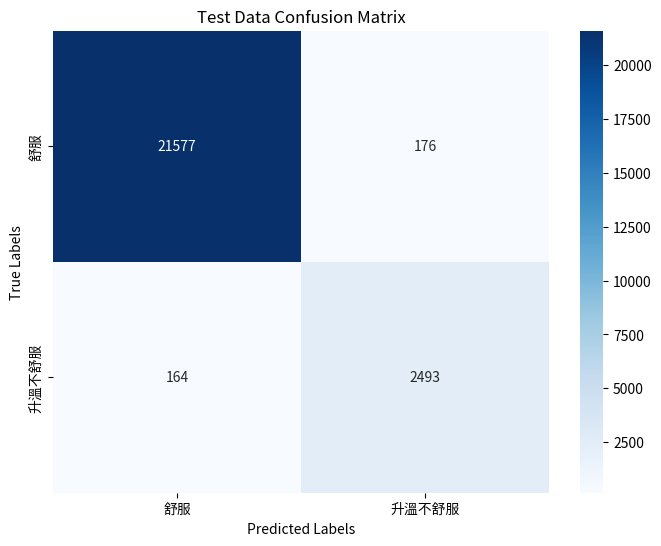

驗證集準確率: 0.82454497571253
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      0.92      0.90     15172
       升溫不舒服       0.08      0.05      0.06      1915

    accuracy                           0.82     17087
   macro avg       0.48      0.49      0.48     17087
weighted avg       0.79      0.82      0.81     17087

驗證集混淆矩陣:


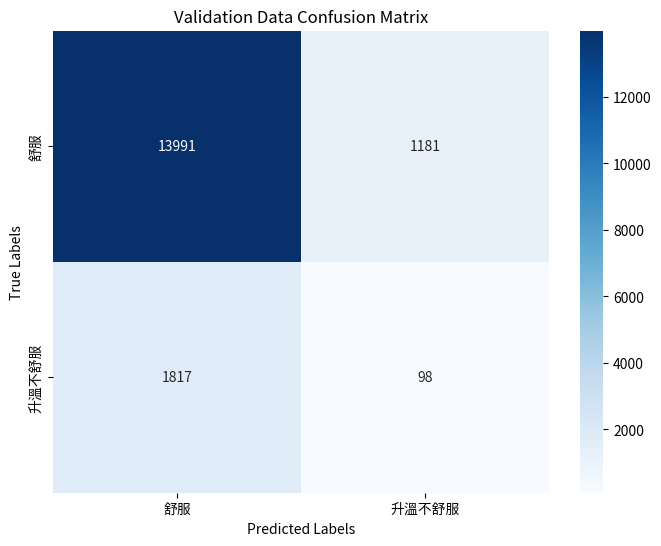

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    X_train_new.append([gamma_combined,theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma_combined = test_data.iloc[i]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    X_test_new.append([gamma_combined,theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma_combined = validation_data.iloc[i]['gamma']
    theta_combined = validation_data.iloc[i]['theta']
    X_val_new.append(([theta_combined,theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9972142564522737
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.97      0.99      2657

    accuracy                           1.00     24410
   macro avg       1.00      0.99      0.99     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


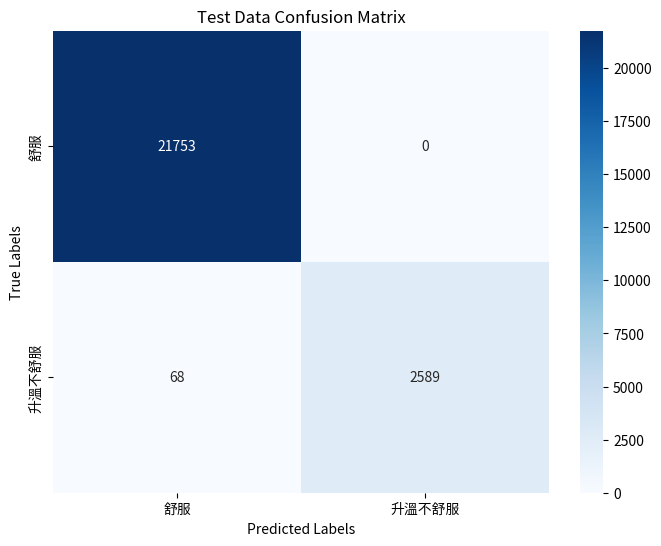

驗證集準確率: 0.8340843916427694
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.90      0.92      0.91     15172
       升溫不舒服       0.19      0.15      0.17      1915

    accuracy                           0.83     17087
   macro avg       0.54      0.53      0.54     17087
weighted avg       0.82      0.83      0.82     17087

驗證集混淆矩陣:


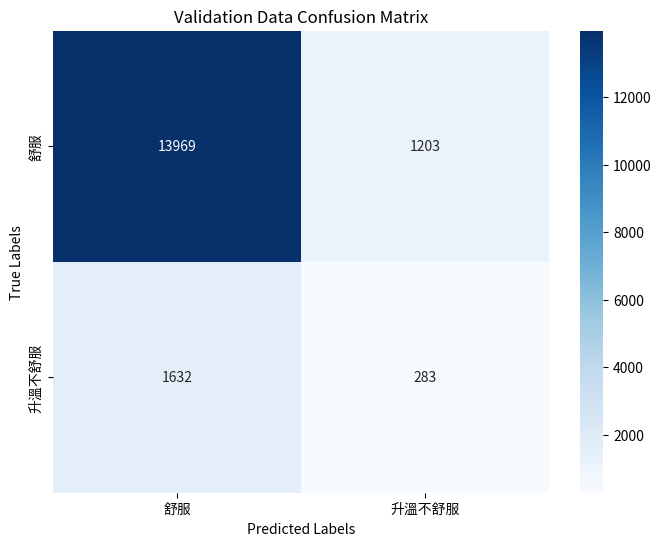

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    X_train_new.append([gamma_combined,theta_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma_combined = test_data.iloc[i]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    X_test_new.append([gamma_combined,theta_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma_combined = validation_data.iloc[i]['gamma']
    theta_combined = validation_data.iloc[i]['theta']
    X_val_new.append(([theta_combined,theta_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9991396968455551
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.99      1.00      2657

    accuracy                           1.00     24410
   macro avg       1.00      1.00      1.00     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


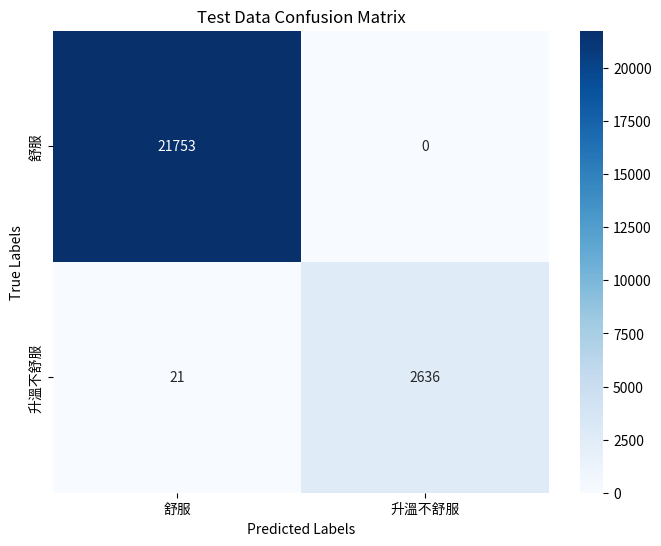

驗證集準確率: 0.9991806636624334
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15172
       升溫不舒服       1.00      0.99      1.00      1915

    accuracy                           1.00     17087
   macro avg       1.00      1.00      1.00     17087
weighted avg       1.00      1.00      1.00     17087

驗證集混淆矩陣:


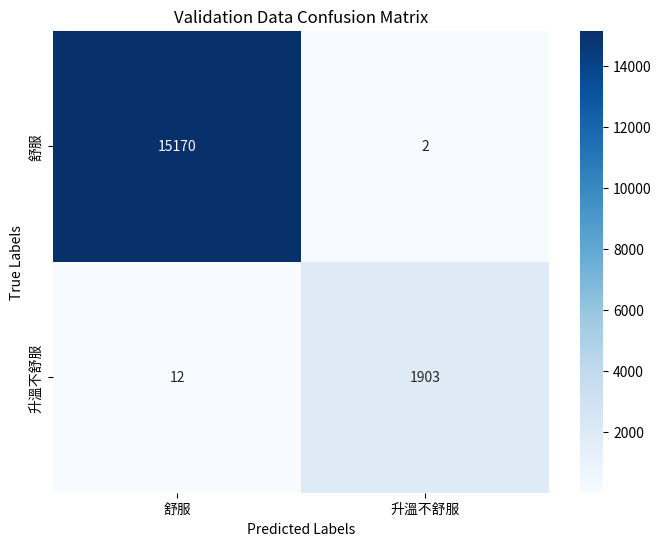

In [39]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_Cz_combined = train_data.iloc[i]['gamma_Cz']  # 直接取出數值
    gamma_Fz_combined = train_data.iloc[i]['gamma_Fz']  # 直接取出數值
    theta_Cz_combined = train_data.iloc[i]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i]['theta_Fz']  # 直接取出數值
    X_train_new.append(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   gamma_Cz_combined = test_data.iloc[i]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = test_data.iloc[i]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = test_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i]['theta_Fz']  # 直接取出數值
   X_test_new.append(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   gamma_Cz_combined = validation_data.iloc[i]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = validation_data.iloc[i]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = validation_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i]['theta_Fz']  # 直接取出數值
   X_val_new.append(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9858664481769767
測試集分類報告:
              precision    recall  f1-score   support

          舒服       0.99      0.99      0.99     21753
       升溫不舒服       0.94      0.93      0.94      2657

    accuracy                           0.99     24410
   macro avg       0.96      0.96      0.96     24410
weighted avg       0.99      0.99      0.99     24410

測試集混淆矩陣:


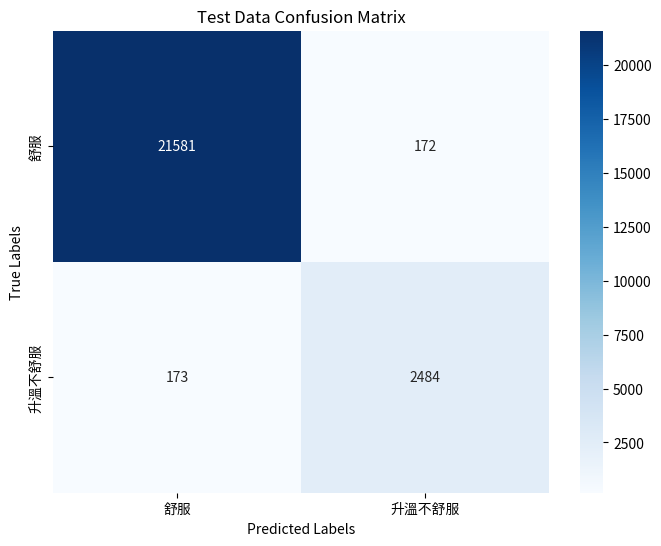

驗證集準確率: 0.8260666003394393
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.89      0.92      0.90     15172
       升溫不舒服       0.08      0.05      0.06      1915

    accuracy                           0.83     17087
   macro avg       0.48      0.49      0.48     17087
weighted avg       0.80      0.83      0.81     17087

驗證集混淆矩陣:


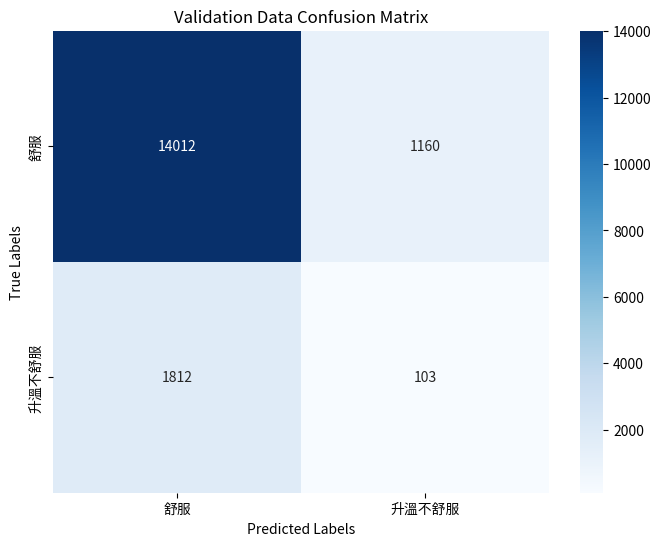

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([gamma_combined,theta_combined,alpha_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma_combined = test_data.iloc[i]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([gamma_combined,theta_combined,alpha_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma_combined = validation_data.iloc[i]['gamma']
    theta_combined = validation_data.iloc[i]['theta']
    alpha_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined,theta_combined,alpha_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.997501024170422
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.98      0.99      2657

    accuracy                           1.00     24410
   macro avg       1.00      0.99      0.99     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


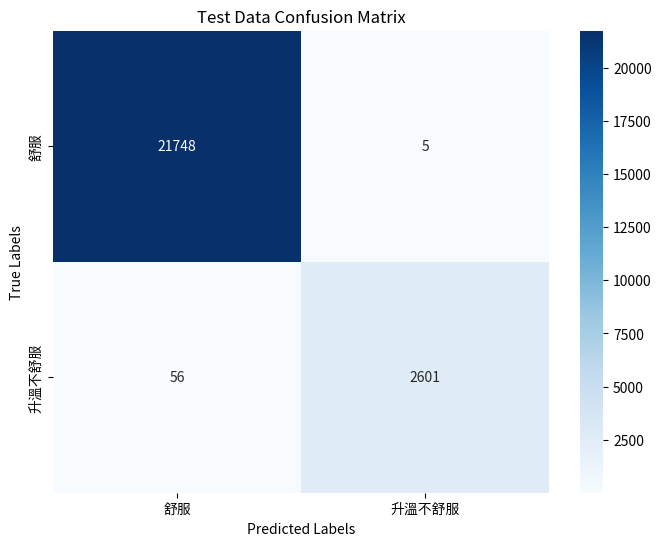

驗證集準確率: 0.8396441739333996
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       0.90      0.93      0.91     15172
       升溫不舒服       0.20      0.15      0.17      1915

    accuracy                           0.84     17087
   macro avg       0.55      0.54      0.54     17087
weighted avg       0.82      0.84      0.83     17087

驗證集混淆矩陣:


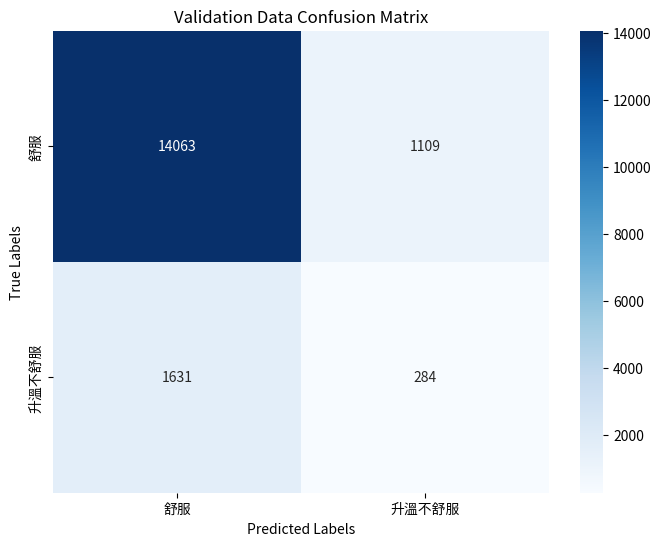

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_combined = train_data.iloc[i]['gamma']  # 直接取出數值
    theta_combined = train_data.iloc[i]['theta']  # 直接取出數值
    alpha_combined = train_data.iloc[i]['alpha']  # 直接取出數值
    X_train_new.append([gamma_combined,theta_combined,alpha_combined])  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma_combined = test_data.iloc[i]['gamma']  # 使用theta值
    theta_combined = test_data.iloc[i]['theta']  # 使用theta值
    alpha_combined = test_data.iloc[i]['alpha']  # 使用theta值
    X_test_new.append([gamma_combined,theta_combined,alpha_combined])  # 包裝成列表，與X_train_new的格式一致
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma_combined = validation_data.iloc[i]['gamma']
    theta_combined = validation_data.iloc[i]['theta']
    alpha_combined = validation_data.iloc[i]['alpha']
    X_val_new.append(([theta_combined,theta_combined,alpha_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9990987300286768
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21753
       升溫不舒服       1.00      0.99      1.00      2657

    accuracy                           1.00     24410
   macro avg       1.00      1.00      1.00     24410
weighted avg       1.00      1.00      1.00     24410

測試集混淆矩陣:


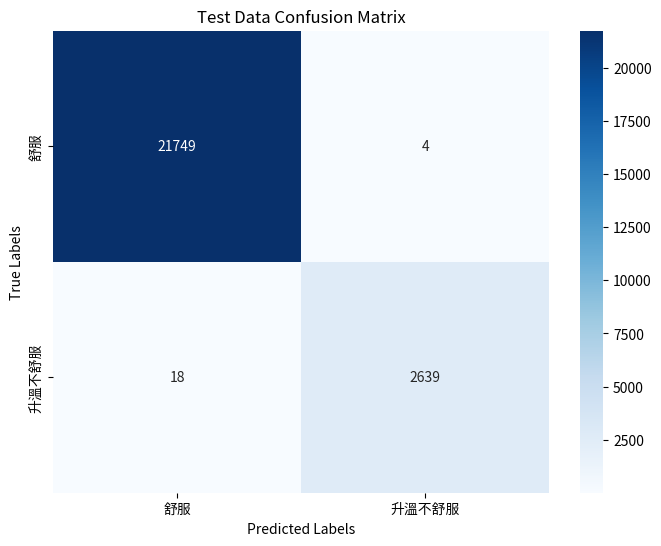

驗證集準確率: 0.9992391876865453
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15172
       升溫不舒服       1.00      0.99      1.00      1915

    accuracy                           1.00     17087
   macro avg       1.00      1.00      1.00     17087
weighted avg       1.00      1.00      1.00     17087

驗證集混淆矩陣:


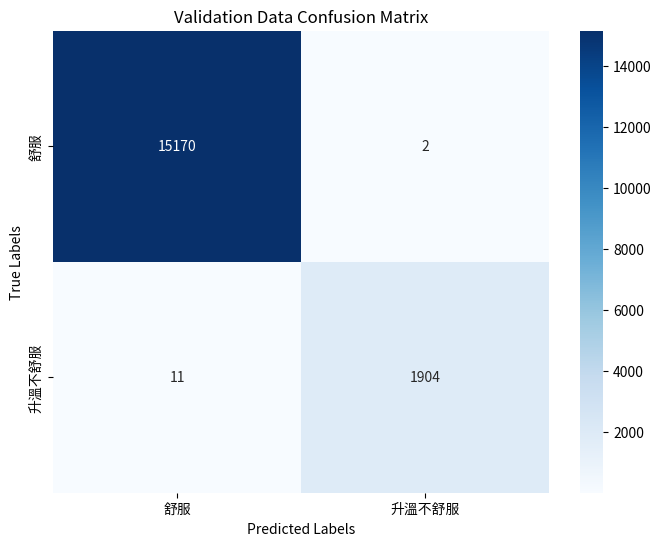

In [42]:
#羅吉斯回歸 Cz Fz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_3features_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma_Cz_combined = train_data.iloc[i]['gamma_Cz']  # 直接取出數值
    gamma_Fz_combined = train_data.iloc[i]['gamma_Fz']  # 直接取出數值
    theta_Cz_combined = train_data.iloc[i]['theta_Cz']  # 直接取出數值
    theta_Fz_combined = train_data.iloc[i]['theta_Fz']  # 直接取出數值
    alpha_Cz_combined = train_data.iloc[i]['alpha_Cz']  # 直接取出數值
    alpha_Fz_combined = train_data.iloc[i]['alpha_Fz']  # 直接取出數值
    X_train_new.append(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
   gamma_Cz_combined = test_data.iloc[i]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = test_data.iloc[i]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = test_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = test_data.iloc[i]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = test_data.iloc[i]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = test_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_test_new.append(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
   gamma_Cz_combined = validation_data.iloc[i]['gamma_Cz']  # 直接取出數值
   gamma_Fz_combined = validation_data.iloc[i]['gamma_Fz']  # 直接取出數值
   theta_Cz_combined = validation_data.iloc[i]['theta_Cz']  # 直接取出數值
   theta_Fz_combined = validation_data.iloc[i]['theta_Fz']  # 直接取出數值
   alpha_Cz_combined = validation_data.iloc[i]['alpha_Cz']  # 直接取出數值
   alpha_Fz_combined = validation_data.iloc[i]['alpha_Fz']  # 直接取出數值
   X_val_new.append(([gamma_Cz_combined,gamma_Fz_combined,theta_Cz_combined,theta_Fz_combined,alpha_Cz_combined,alpha_Fz_combined]))  # 包裝成列表，以便保持與後續陣列操作的一致性
   y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 0.9998758380928731
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21869
       升溫不舒服       1.00      1.00      1.00      2293

    accuracy                           1.00     24162
   macro avg       1.00      1.00      1.00     24162
weighted avg       1.00      1.00      1.00     24162

測試集混淆矩陣:


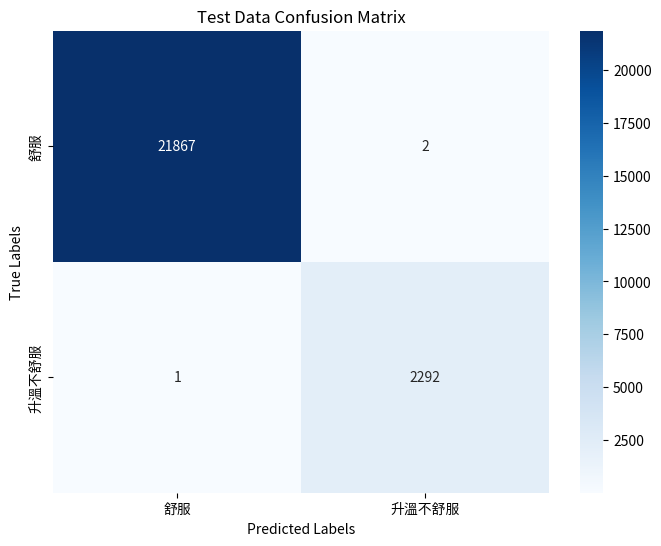

驗證集準確率: 1.0
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15212
       升溫不舒服       1.00      1.00      1.00      1702

    accuracy                           1.00     16914
   macro avg       1.00      1.00      1.00     16914
weighted avg       1.00      1.00      1.00     16914

驗證集混淆矩陣:


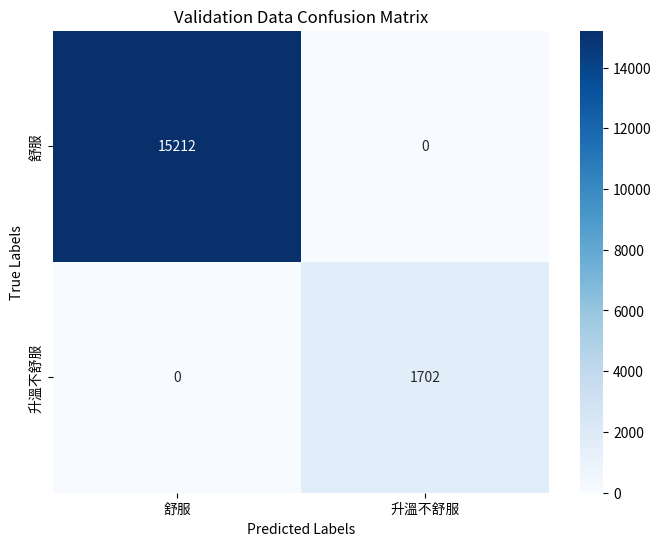

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_gamma6_Cz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma3_combined = train_data.iloc[i]['gamma3']  # 直接取出數值
    gamma1_combined = train_data.iloc[i]['gamma1']  # 直接取出數值
    gamma2_combined = train_data.iloc[i]['gamma2']  # 直接取出數值
    gamma4_combined = train_data.iloc[i]['gamma4']
    gamma5_combined = train_data.iloc[i]['gamma5']
    gamma6_combined = train_data.iloc[i]['gamma6']
    X_train_new.append(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined]))
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma3_combined = test_data.iloc[i]['gamma3']  # 直接取出數值
    gamma1_combined = test_data.iloc[i]['gamma1']  # 直接取出數值
    gamma2_combined = test_data.iloc[i]['gamma2']  # 直接取出數值
    gamma4_combined = test_data.iloc[i]['gamma4']
    gamma5_combined = test_data.iloc[i]['gamma5']
    gamma6_combined = test_data.iloc[i]['gamma6']
    X_test_new.append(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined]))
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma3_combined = validation_data.iloc[i]['gamma3']  # 直接取出數值
    gamma1_combined = validation_data.iloc[i]['gamma1']  # 直接取出數值
    gamma2_combined = validation_data.iloc[i]['gamma2']  # 直接取出數值
    gamma4_combined = validation_data.iloc[i]['gamma4']
    gamma5_combined = validation_data.iloc[i]['gamma5']
    gamma6_combined = validation_data.iloc[i]['gamma6']
    X_val_new.append(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 1.0
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21869
       升溫不舒服       1.00      1.00      1.00      2293

    accuracy                           1.00     24162
   macro avg       1.00      1.00      1.00     24162
weighted avg       1.00      1.00      1.00     24162

測試集混淆矩陣:


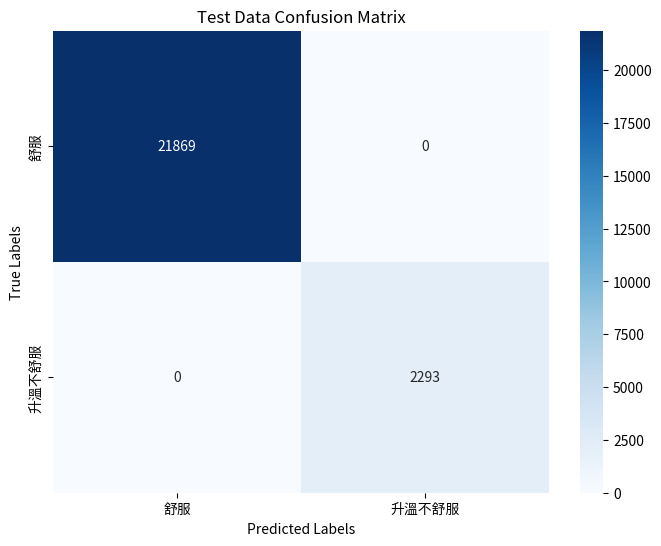

驗證集準確率: 1.0
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15212
       升溫不舒服       1.00      1.00      1.00      1702

    accuracy                           1.00     16914
   macro avg       1.00      1.00      1.00     16914
weighted avg       1.00      1.00      1.00     16914

驗證集混淆矩陣:


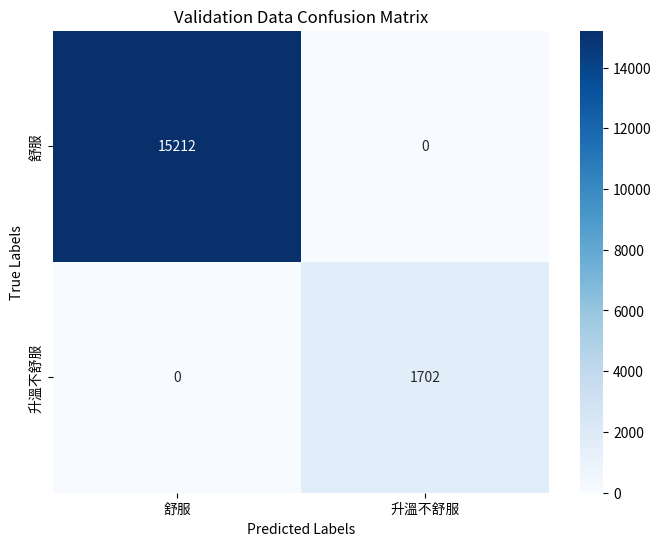

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_gamma6_Fz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma3_combined = train_data.iloc[i]['gamma3']  # 直接取出數值
    gamma1_combined = train_data.iloc[i]['gamma1']  # 直接取出數值
    gamma2_combined = train_data.iloc[i]['gamma2']  # 直接取出數值
    gamma4_combined = train_data.iloc[i]['gamma4']
    gamma5_combined = train_data.iloc[i]['gamma5']
    gamma6_combined = train_data.iloc[i]['gamma6']
    X_train_new.append(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined]))
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma3_combined = test_data.iloc[i]['gamma3']  # 直接取出數值
    gamma1_combined = test_data.iloc[i]['gamma1']  # 直接取出數值
    gamma2_combined = test_data.iloc[i]['gamma2']  # 直接取出數值
    gamma4_combined = test_data.iloc[i]['gamma4']
    gamma5_combined = test_data.iloc[i]['gamma5']
    gamma6_combined = test_data.iloc[i]['gamma6']
    X_test_new.append(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined]))
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma3_combined = validation_data.iloc[i]['gamma3']  # 直接取出數值
    gamma1_combined = validation_data.iloc[i]['gamma1']  # 直接取出數值
    gamma2_combined = validation_data.iloc[i]['gamma2']  # 直接取出數值
    gamma4_combined = validation_data.iloc[i]['gamma4']
    gamma5_combined = validation_data.iloc[i]['gamma5']
    gamma6_combined = validation_data.iloc[i]['gamma6']
    X_val_new.append(([gamma1_combined, gamma2_combined, gamma3_combined, gamma4_combined, gamma5_combined, gamma6_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

測試集準確率: 1.0
測試集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     21869
       升溫不舒服       1.00      1.00      1.00      2293

    accuracy                           1.00     24162
   macro avg       1.00      1.00      1.00     24162
weighted avg       1.00      1.00      1.00     24162

測試集混淆矩陣:


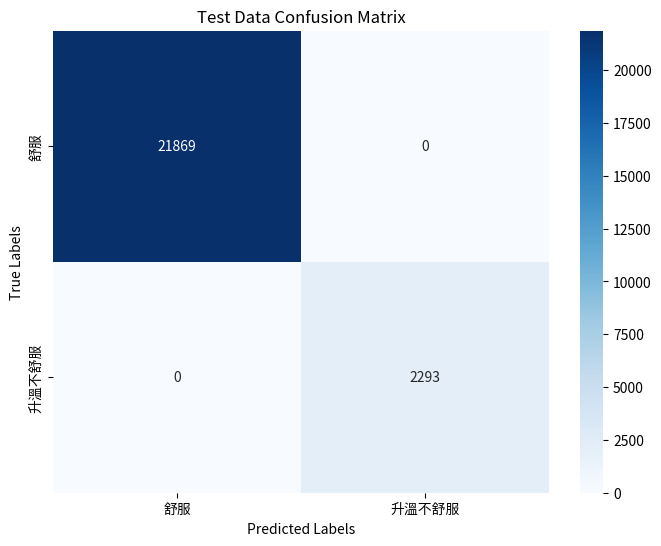

驗證集準確率: 1.0
驗證集分類報告:
              precision    recall  f1-score   support

          舒服       1.00      1.00      1.00     15212
       升溫不舒服       1.00      1.00      1.00      1702

    accuracy                           1.00     16914
   macro avg       1.00      1.00      1.00     16914
weighted avg       1.00      1.00      1.00     16914

驗證集混淆矩陣:


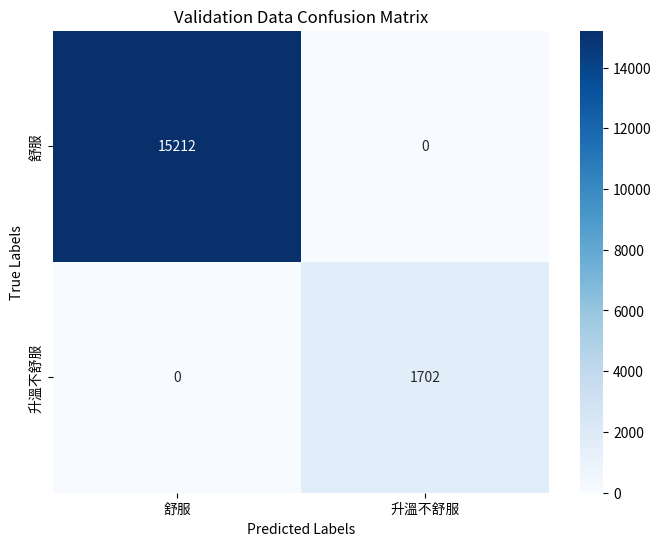

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 讀取CSV檔
data = pd.read_csv('new_light_gamma6_CzFz.csv')

# 分割資料：70%給train_data, 30%給test_data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 再從train_data中分割出30%給validation_data
train_data, validation_data = train_test_split(train_data, test_size=0.3, random_state=42)

# 將訓練資料每三筆資料組合成一個新的特徵向量
X_train_new = []
y_train_new = []

for i in range(len(train_data)):
    gamma1_CZ_combined = train_data.iloc[i]['gamma1_Cz']
    gamma2_CZ_combined = train_data.iloc[i]['gamma2_Cz']
    gamma3_CZ_combined = train_data.iloc[i]['gamma3_Cz']
    gamma4_CZ_combined = train_data.iloc[i]['gamma4_Cz']
    gamma5_CZ_combined = train_data.iloc[i]['gamma5_Cz'] 
    gamma6_CZ_combined = train_data.iloc[i]['gamma6_Cz'] 
    gamma1_FZ_combined = train_data.iloc[i]['gamma1_Fz'] 
    gamma2_FZ_combined = train_data.iloc[i]['gamma2_Fz'] 
    gamma3_FZ_combined = train_data.iloc[i]['gamma3_Fz'] 
    gamma4_FZ_combined = train_data.iloc[i]['gamma4_Fz'] 
    gamma5_FZ_combined = train_data.iloc[i]['gamma5_Fz'] 
    gamma6_FZ_combined = train_data.iloc[i]['gamma6_Fz'] 
    #X_train_new.append(np.concatenate([gamma2_CZ_combined, gamma3_CZ_combined,gamma2_FZ_combined, gamma3_FZ_combined]))
    X_train_new.append(([gamma1_CZ_combined,gamma2_CZ_combined, gamma3_CZ_combined,gamma4_CZ_combined,gamma5_CZ_combined, gamma6_CZ_combined,gamma1_FZ_combined,gamma2_FZ_combined, gamma3_FZ_combined,gamma4_FZ_combined,gamma5_FZ_combined, gamma6_FZ_combined]))
    y_train_new.append(train_data.iloc[i]['state'])  # 取出 'state' 作為目標值

X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

# 將測試資料每三筆資料組合成一個新的特徵向量
X_test_new = []
y_test_new = []

for i in range(len(test_data)):
    gamma1_CZ_combined = test_data.iloc[i]['gamma1_Cz'] 
    gamma2_CZ_combined = test_data.iloc[i]['gamma2_Cz'] 
    gamma3_CZ_combined = test_data.iloc[i]['gamma3_Cz'] 
    gamma4_CZ_combined = test_data.iloc[i]['gamma4_Cz'] 
    gamma5_CZ_combined = test_data.iloc[i]['gamma5_Cz'] 
    gamma6_CZ_combined = test_data.iloc[i]['gamma6_Cz'] 
    gamma1_FZ_combined = test_data.iloc[i]['gamma1_Fz'] 
    gamma2_FZ_combined = test_data.iloc[i]['gamma2_Fz'] 
    gamma3_FZ_combined = test_data.iloc[i]['gamma3_Fz'] 
    gamma4_FZ_combined = test_data.iloc[i]['gamma4_Fz'] 
    gamma5_FZ_combined = test_data.iloc[i]['gamma5_Fz'] 
    gamma6_FZ_combined = test_data.iloc[i]['gamma6_Fz'] 
    #X_train_new.append(np.concatenate([gamma2_CZ_combined, gamma3_CZ_combined,gamma2_FZ_combined, gamma3_FZ_combined]))
    X_test_new.append(([gamma1_CZ_combined,gamma2_CZ_combined, gamma3_CZ_combined,gamma4_CZ_combined,gamma5_CZ_combined, gamma6_CZ_combined,gamma1_FZ_combined,gamma2_FZ_combined, gamma3_FZ_combined,gamma4_FZ_combined,gamma5_FZ_combined, gamma6_FZ_combined]))
    y_test_new.append(test_data.iloc[i]['state'])  # 使用state作為目標值

X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 將驗證資料每三筆資料組合成一個新的特徵向量
X_val_new = []
y_val_new = []

for i in range( len(validation_data)):
    gamma1_CZ_combined = validation_data.iloc[i]['gamma1_Cz'] 
    gamma2_CZ_combined = validation_data.iloc[i]['gamma2_Cz'] 
    gamma3_CZ_combined = validation_data.iloc[i]['gamma3_Cz'] 
    gamma4_CZ_combined = validation_data.iloc[i]['gamma4_Cz'] 
    gamma5_CZ_combined = validation_data.iloc[i]['gamma5_Cz'] 
    gamma6_CZ_combined = validation_data.iloc[i]['gamma6_Cz'] 
    gamma1_FZ_combined = validation_data.iloc[i]['gamma1_Fz'] 
    gamma2_FZ_combined = validation_data.iloc[i]['gamma2_Fz'] 
    gamma3_FZ_combined = validation_data.iloc[i]['gamma3_Fz'] 
    gamma4_FZ_combined = validation_data.iloc[i]['gamma4_Fz'] 
    gamma5_FZ_combined = validation_data.iloc[i]['gamma5_Fz'] 
    gamma6_FZ_combined = validation_data.iloc[i]['gamma6_Fz'] 
    #X_train_new.append(np.concatenate([gamma2_CZ_combined, gamma3_CZ_combined,gamma2_FZ_combined, gamma3_FZ_combined]))
    X_val_new.append(([gamma1_CZ_combined,gamma2_CZ_combined, gamma3_CZ_combined,gamma4_CZ_combined,gamma5_CZ_combined, gamma6_CZ_combined,gamma1_FZ_combined,gamma2_FZ_combined, gamma3_FZ_combined,gamma4_FZ_combined,gamma5_FZ_combined, gamma6_FZ_combined]))
    y_val_new.append(validation_data.iloc[i]['state'])  # 使用第一筆資料的狀態作為目標值

X_val_new = np.array(X_val_new)
y_val_new = np.array(y_val_new)

# 創建羅吉斯回歸模型
model = LogisticRegression(max_iter=1000)  # 使用max_iter=1000確保收斂

# 訓練模型
model.fit(X_train_new, y_train_new)

# 預測測試集
y_pred_test = model.predict(X_test_new)

# 預測驗證集
y_pred_val = model.predict(X_val_new)

# 計算測試集準確率
accuracy_test = accuracy_score(y_test_new, y_pred_test)
print(f"測試集準確率: {accuracy_test}")

# 印出測試集分類報告
print("測試集分類報告:")
print(classification_report(y_test_new, y_pred_test, target_names=['舒服', '升溫不舒服']))

# 印出測試集混淆矩陣
print("測試集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_new, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 計算驗證集準確率
accuracy_val = accuracy_score(y_val_new, y_pred_val)
print(f"驗證集準確率: {accuracy_val}")

# 印出驗證集分類報告
print("驗證集分類報告:")
print(classification_report(y_val_new, y_pred_val, target_names=['舒服', '升溫不舒服']))

# 印出驗證集混淆矩陣
print("驗證集混淆矩陣:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_new, y_pred_val), annot=True, cmap='Blues', fmt='d', xticklabels=['舒服', '升溫不舒服'], yticklabels=['舒服', '升溫不舒服'])
plt.title('Validation Data Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()